In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!pip install kiwipiepy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install Pillow --upgrade
!pip install numpy
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
df_dic = pd.read_excel('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/합본.xlsx')
print(df_dic[:100])

     단어    클래스
0    일본  항일+민족
1    민족  항일+민족
2    조선  항일+민족
3    독립  항일+민족
4    사람  항일+민족
..  ...    ...
95  러시아  항일+민족
96   국가  항일+민족
97   문명  항일+민족
98   학교  항일+민족
99   인민  항일+민족

[100 rows x 2 columns]


In [4]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
wordList = df_dic.loc[:,["단어"]]
wordType = set()

wordsPOS = []
for i in range(0,len(wordList)):
    classWords = str(df_dic.loc[i,"클래스"])
    wordType.add(str(classWords))
    target = wordList.iloc[i,0]
    posTagout = kiwi.tokenize(target)
    # print(posTagout)
    wordPOS = ""
    for eachOut in posTagout:
        result = eachOut[0]+"/"+eachOut[1]
        wordPOS = result
        break
    wordPOS = wordPOS.strip()
    wordsPOS.append(wordPOS)
print(wordsPOS[:10])
print(wordType)

['일본/NNP', '민족/NNG', '조선/NNP', '독립/NNG', '사람/NNG', '세계/NNG', '나라/NNG', '일/NNG', '동포/NNG', '말/NNG']
{'공화정 국가 수립 + 개혁적', '비폭력(비무장)+평화', '폭력(무장)', '항일+민족', '국제주의+세계적'}


In [5]:
df_dic['품사태깅'] = wordsPOS
classWords = list(wordType)
print(df_dic[:100])
print(classWords)

     단어    클래스     품사태깅
0    일본  항일+민족   일본/NNP
1    민족  항일+민족   민족/NNG
2    조선  항일+민족   조선/NNP
3    독립  항일+민족   독립/NNG
4    사람  항일+민족   사람/NNG
..  ...    ...      ...
95  러시아  항일+민족  러시아/NNP
96   국가  항일+민족   국가/NNG
97   문명  항일+민족   문명/NNG
98   학교  항일+민족   학교/NNG
99   인민  항일+민족   인민/NNG

[100 rows x 3 columns]
['공화정 국가 수립 + 개혁적', '비폭력(비무장)+평화', '폭력(무장)', '항일+민족', '국제주의+세계적']


In [6]:
#감정들이 가지고 있는 단어 목록 확인하기
ontologyDic = {}
for eachClass in classWords:
    ontologyDic[eachClass] = list(df_dic[df_dic.클래스==eachClass]['품사태깅'])
    print(eachClass)
    print(list(df_dic[df_dic.클래스==eachClass]['품사태깅']))
print(ontologyDic)

공화정 국가 수립 + 개혁적
['신경/NNG', '개성/NNG', '통재/NNG', '장님/NNG', '육군/NNG', '시체/NNG', '기념식/NNG', '쇠퇴/NNG', '효과/NNG', '육체/NNG', '육해군/NNG', '공민/NNG', '정오/NNG', '통상/MAG', '윤덕영/NNP', '곤궁/NNG', '홍/NNP', '간교/NNG', '정면/NNG', '강력/NNG', '기질/NNG', '들판/NNG', '원숭이/NNG', '설득/NNG', '원산/NNP', '낭독/NNG', '근/NNG', '이/MM', '쓸개/NNG', '물거품/NNG', '선전부/NNG', '씨/IC', '자유민보/NNG', '물산/NNG', '극동/NNP', '관심/NNG', '이리/MAG', '협력/NNG', '아들/NNG', '이리/MAG', '극단/NNG', '이목/NNG', '조리/NNG', '건전/NNG', '다리/NNG', '문관/NNG', '회계/NNG', '관문/NNG', '거울/NNG']
비폭력(비무장)+평화
['간부/NNG', '부총장/NNG', '총애/NNG', '총리/NNG', '휴학/NNG', '연설회/NNG', '부합/NNG', '대한국민의회/NNP', '주교/NNG', '국경/NNG', '염치/NNG', '최/NNP', '주소/NNG', '분별/NNG', '일본사회당/NNP', '보답/NNG', '예배/NNG', '예법/NNG', '번창/NNG', '구/NNG', '번영/NNG', '번성/NNG', '전북/NNP', '꾀/NNG', '교환/NNG', '교토/NNP', '추/VV', '전신/NNG', '존망/NNG', '존경/NNG', '굴욕/NNG', '임용/NNG', '폭도/NNG', '약탈/NNG']
폭력(무장)
['법률/NNG', '지위/NNG', '필리핀/NNP', '대/NNB', '흐름/NNG', '인도주의/NNG', '집회/NNG', '박/NNP', '학대/NNG', '파견/NNG', '신음/NNG', '한/MM', '속임수/NN

In [7]:
#단어-감정 사전 만들기
wordOntologyDic = {}
for i in range(0,len(df_dic)):
    wordOntologyDic[df_dic.loc[i,"품사태깅"]] = df_dic.loc[i,"클래스"]
print(wordOntologyDic)

{'일본/NNP': '항일+민족', '민족/NNG': '항일+민족', '조선/NNP': '항일+민족', '독립/NNG': '항일+민족', '사람/NNG': '항일+민족', '세계/NNG': '항일+민족', '나라/NNG': '항일+민족', '일/NNG': '항일+민족', '동포/NNG': '항일+민족', '말/NNG': '항일+민족', '자유/NNG': '항일+민족', '일본인/NNG': '항일+민족', '평화/NNG': '항일+민족', '하늘/NNG': '항일+민족', '정부/NNG': '항일+민족', '마음/NNG': '항일+민족', '조선인/NNG': '항일+민족', '행동/NNG': '항일+민족', '국민/NNG': '항일+민족', '생각/NNG': '항일+민족', '한국/NNP': '항일+민족', '정의/NNG': '항일+민족', '때/NNG': '항일+민족', '가운데/NNG': '항일+민족', '만세/IC': '항일+민족', '피/NNG': '항일+민족', '회의/NNG': '항일+민족', '아래/NNG': '항일+민족', '역사/NNG': '항일+민족', '백성/NNG': '항일+민족', '동안/NNG': '항일+민족', '자신/NNG': '항일+민족', '정신/NNG': '항일+민족', '운동/NNG': '항일+민족', '앞/NNG': '항일+민족', '소리/NNG': '항일+민족', '미국/NNP': '항일+민족', '나/NP': '항일+민족', '원수/NNG': '항일+민족', '대표/NNG': '항일+민족', '시대/NNG': '항일+민족', '이번/NNG': '항일+민족', '과거/NNG': '항일+민족', '생명/NNG': '항일+민족', '이상/NNG': '항일+민족', '세상/NNG': '항일+민족', '전쟁/NNG': '항일+민족', '동양/NNG': '항일+민족', '선언/NNG': '항일+민족', '후/IC': '항일+민족', '힘/NNG': '항일+민족', '뜻/NNG': '항일+민족', '속/NNG': '항일+민족', '형

In [8]:
# 데이터 불러오기
import re

fileDir = "C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/text/일본외무성문서(불령단관계잡건).txt"
fr = open(fileDir, 'r', encoding='utf-8')
contents = fr.readlines()
fr.close()

reviewList = []
for content in contents:
    content = re.sub('[^가-힣]', ' ', content).replace("\n","")
    content = re.sub('[\s]+', ' ', content).strip()
    if content == "" or content == " ":
        pass
    else:
        reviewList.append(content)

for eachReview in reviewList:
    print(eachReview)

선언서
반만년 역사의 권위와 이천만 민중의 정성에 의지하여 우리나라가 독립국이라는 것과 우리 민족이 자유민이라는 것을 세계 여러 나라에 선언하며 또한 증언하노라
무궁화 피는 푸른 언덕 은 결코 남의 식민지가 된 적이 없었고 단군의 후손이자 고구려의 후예들은 한 번도 남의 노예 신세가 되지 않았다 나라는 동방의 군자의 나라이며 민족은 선진적인 착한 백성들이었다
그러나 나라의 운수가 꽉 막히게 되었다 잘 다스려진 세상이 오래 이어진 후 혼란스러운 세상이 찾아오게 되었다 밖으로는 우리를 집어삼키려는 강한 이웃이 나타났고 안으로는 나라를 병들게 하는 간사한 역적들이 생겨났다 오천년 신성한 역사와 이천만 예의바른 민족과 오백년 동안 번성했던 왕조가 하루아침에 자취도 없이 사라졌다
조정에는 순국한 신하가 있었고 재야에는 순절한 백성이 있었다 하지만 하늘이 돌보아 주시지 않으시고 국민이 복이 없었다 황제께서는 입장을 밝히셨지만 도리어 자리에서 쫓겨나는 모욕을 당하셨고 의롭게 일어선 선비와 백성들은 일족까지 모조리 몰살당하는 재앙을 겪어야만 하였다
저들이 지나친 세금과 가혹한 법률로 우리 민족을 노예로 대접하면서 부리려고 하는 바람에 우리 민족은 도저히 살아갈 수 없을 지경이 되었다 이에 대해 한 마디 불평이라도 할라치면 강도로 취급하여 가혹한 형벌로 다스리니 충성스럽고 의로운 영혼들 가운데 저들의 잔인한 칼날 아래에서 사라져 간 이가 몇 천 몇 만이나 되지 않던가
원한과 고통을 씹어 삼키고 와신상담하기 벌써 년의 세월이 지나갔다 어둠 이 다하면 밝음 이 돌아오고 막힌 운세가 끝나면 태평한 운세가 찾아오는 것이 하늘의 이치이다 죽음을 무릅쓰면서 그 가운데 살아갈 길을 찾아내고 오래 굽히고 있으면서도 끝내 일어날 것을 생각하는 것이 사람의 지극한 마음이다
세계 개조와 민족 자결의 주장은 세계적으로 고조되었으며 우리나라의 독립과 우리 민족의 자유를 부르짖는 소리는 나라 안에 울려 퍼졌다 월 일에는 독립을 선언하고 월 일에는 정부를 건설했다 하지만 저 간악한 일본이 시대적 대세가

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\wjh20\AppData\Local\Temp\ipykernel_39296\514665585.py:12: SyntaxWarning: invalid escape sequence '\s'
  content = re.sub('[\s]+', ' ', content).strip()


In [9]:
from kiwipiepy import Kiwi
import re

kiwi = Kiwi()
#품사태깅된 문장
reviewPOSList = []
#단어의 타입 확인
wordType = set()
sentencePOSAll = []
sentencePOSContent = []
sentencePOSTextAll = ""

MWEsList = open('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/복합어 사전.txt', encoding='UTF-8').readlines()

for eachReview in reviewList:
    #띄어쓰기
    eachReviewSpace = kiwi.space(eachReview)
    #문장 분할
    eachReviewSpaceSentences = kiwi.split_into_sents(eachReviewSpace)
    for sentence in eachReviewSpaceSentences:
        content = sentence.text
        #품사태깅
        for i in range(0,len(MWEsList)):
            eachMWEs = MWEsList[i].replace("\n","").strip()
            content = content.replace(eachMWEs, eachMWEs.replace(" ","_"))
        posTagout = kiwi.tokenize(content)
        sentencePOS = ''
        for eachOut in posTagout:
            if "NN" in eachOut[1] :
                if "_" in eachOut[0]:
                    resultContent = eachOut[0]+"/MWEs"
                else:
                    resultContent = eachOut[0] + "/" + eachOut[1]
                sentencePOSContent.append(resultContent)
            if "_" in eachOut[0]:
                result = eachOut[0] + "/MWEs"
            else:
                result = eachOut[0] + "/" + eachOut[1]
            sentencePOS = sentencePOS + " " + result
            sentencePOSAll.append(result)
            if result != "":
                wordType.add(result)
            sentencePOSTextAll = sentencePOSTextAll + " " + eachOut[0]
        sentencePOS = sentencePOS.strip()
#         sentencePOSAll = sentencePOSAll + " " + sentencePOS
        reviewPOSList.append(sentencePOS)

sentencePOSTextAll = sentencePOSTextAll.strip()

print(sentencePOSContent[:20])
print(sentencePOSAll[:20])
print(wordType)
print(len(wordType))
print(reviewPOSList[:10])
print(len(reviewPOSList))

['선언서/NNG', '반만년/NNG', '역사/NNG', '권위/NNG', '민중/NNG', '정성/NNG', '의지/NNG', '우리나라/NNG', '독립국/NNG', '것/NNB', '민족/NNG', '자유/NNG', '민/NNP', '것/NNB', '세계/NNG', '나라/NNG', '선언/NNG', '증언/NNG', '무궁화/NNG', '언덕/NNG']
['선언서/NNG', '반만년/NNG', '역사/NNG', '의/JKG', '권위/NNG', '와/JC', '이천만/NR', '민중/NNG', '의/JKG', '정성/NNG', '에/JKB', '의지/NNG', '하/XSV', '어/EC', '우리나라/NNG', '가/JKS', '독립국/NNG', '이/VCP', '라는/ETM', '것/NNB']
{'원년/NNG', '거든/EF', '민/NNP', '정회/NNG', '참가/NNG', '내지/NNG', '신민/NNG', '학자/NNG', '이민자/NNG', '일/MM', '쇄신/NNG', '으며/EC', '바르/VA', '주창/NNG', '고루/MAG', '결연/XR', '관대하/VA', '북망산/NNG', '멸시/NNG', '제창/NNG', '후/XR', '해협/NNG', '그러/VV', '전멸/NNG', '옛날/NNG', '소좌/NNG', '낡/VA', '내걸/VV', '폭정/NNG', '장교/NNG', 'ᆷ/EF', '임직원/NNG', '사명/NNG', '습니까/EC', '개척/NNG', '공민/NNG', '빗물/NNG', '이야기/NNG', '발견/NNG', '선명/NNG', '속이/VV', '인도/NNG', '조칙/NNG', '놓치/VV', '재판/NNG', '하나/NR', '개성/NNG', '절대로/MAG', '올해/NNG', '망상/NNG', '통곡/NNG', '시급하/VA', '려/EC', '꼭두각시/NNG', '유감/NNG', '박영근/NNP', '폐지/NNG', '도랑/NNG', '흐르/VV', '배후/NNG', '김철/NNP', '배태

<Axes: xlabel='n', ylabel='word'>

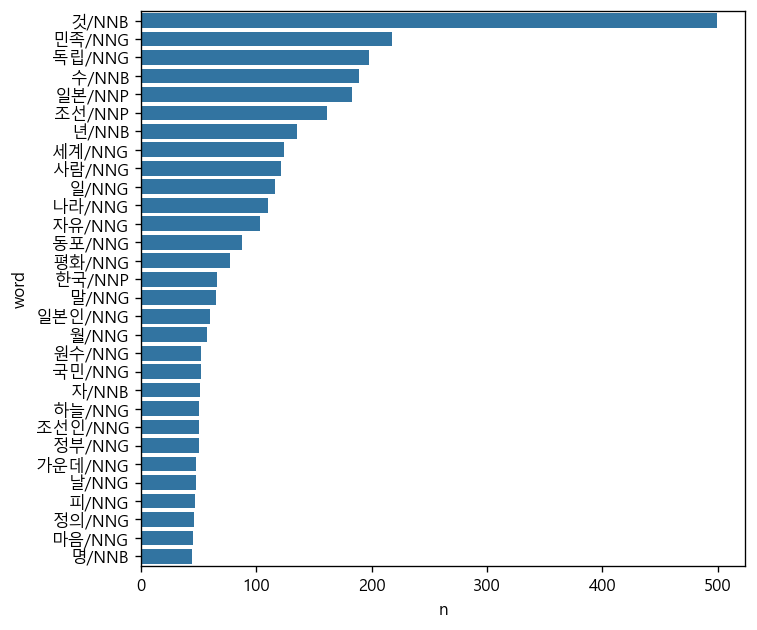

In [10]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSContent})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')

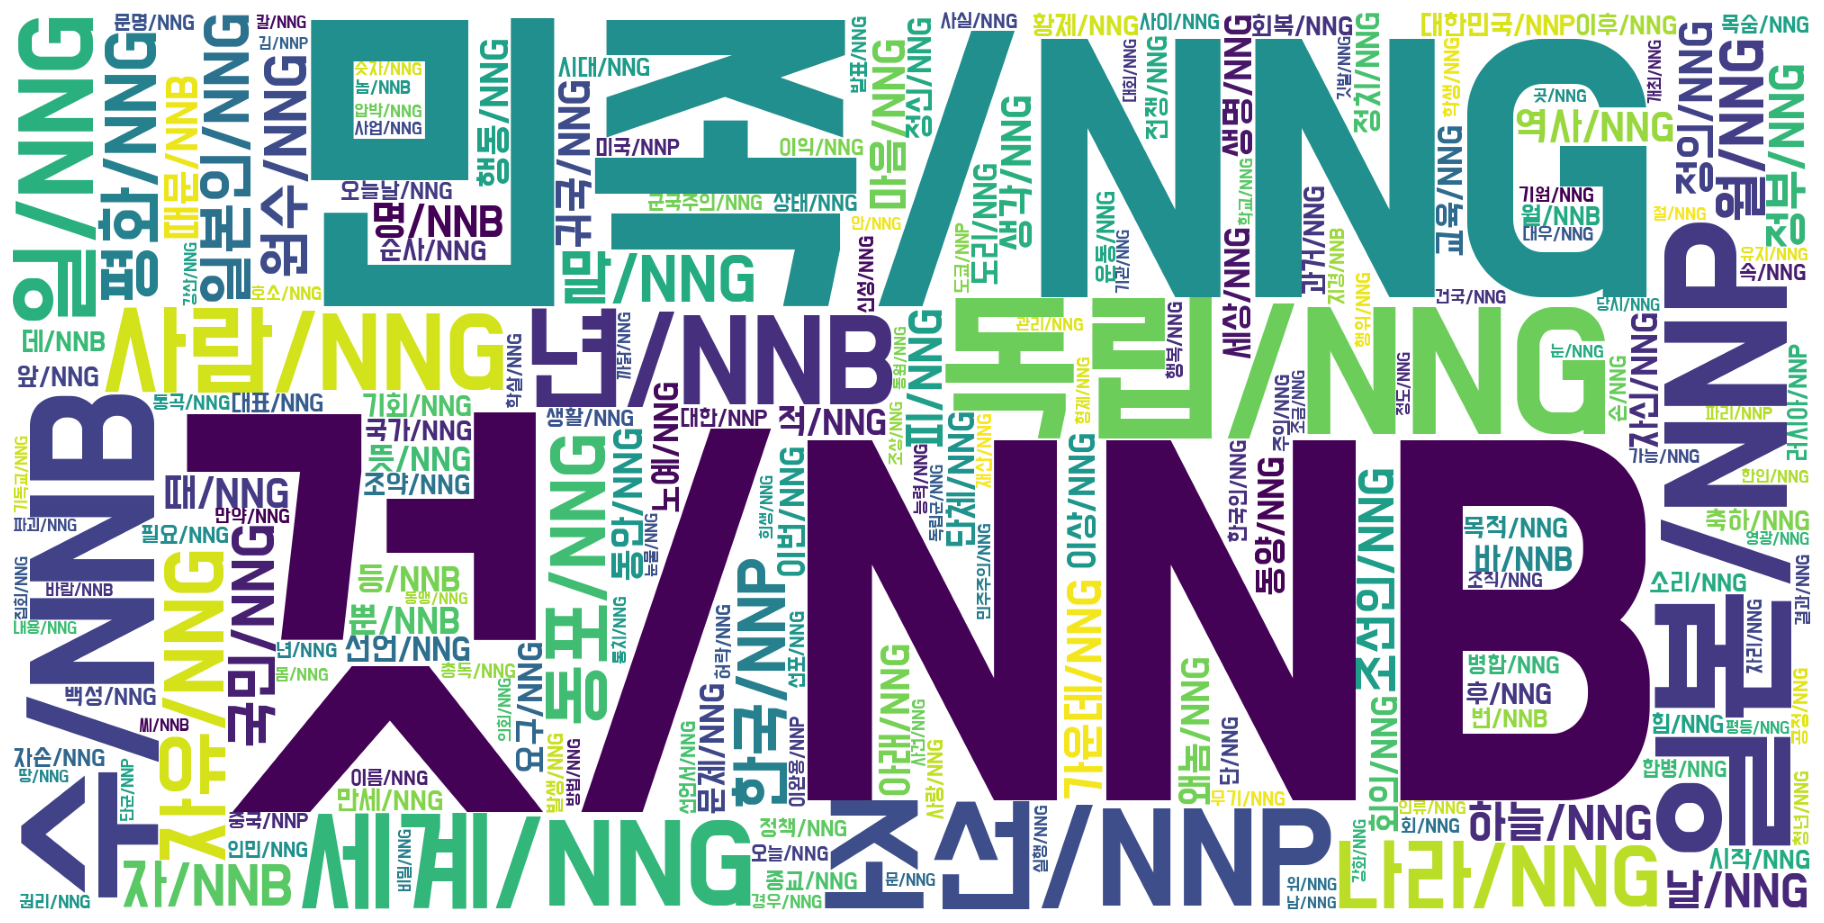

In [11]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = 'C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
import pandas as pd
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
# 0으로 이루어진 단어 행렬 생성 (초기값)
matrixCorpus = pd.DataFrame(0.0, index=classWords, columns=documentIndex)
print(matrixCorpus)

for i in range(0,len(reviewPOSList)):
    sentence = reviewPOSList[i]
    words = sentence.split(" ")
    # print(words)
    for j in range(0,len(words)):
        if words[j] != '':
            #리뷰에서 사용된 단어가 온톨로지에 존재하는 경우 카운트
            if words[j] in wordOntologyDic:
                matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0
            else:
                pass

print(matrixCorpus)

                   0    1    2    3    4    5    6    7    8    9  ...  1438  \
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
비폭력(비무장)+평화      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
폭력(무장)           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
항일+민족            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
국제주의+세계적         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   

                 1439  1440  1441  1442  1443  1444  1445  1446  1447  
공화정 국가 수립 + 개혁적   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
비폭력(비무장)+평화       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
폭력(무장)            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
항일+민족             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
국제주의+세계적          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1448 columns]


C:\Users\wjh20\AppData\Local\Temp\ipykernel_39296\3595135074.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0


                   0     1     2    3    4    5    6    7    8     9  ...  \
공화정 국가 수립 + 개혁적  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   
비폭력(비무장)+평화      0.0   0.0   0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0  ...   
폭력(무장)           0.0   0.0   2.0  0.0  0.0  0.0  0.0  2.0  1.0   1.0  ...   
항일+민족            1.0  12.0  10.0  6.0  8.0  4.0  2.0  6.0  4.0  10.0  ...   
국제주의+세계적         0.0   0.0   2.0  0.0  1.0  3.0  0.0  2.0  0.0   2.0  ...   

                 1438  1439  1440  1441  1442  1443  1444  1445  1446  1447  
공화정 국가 수립 + 개혁적   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  
비폭력(비무장)+평화       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
폭력(무장)            0.0   0.0   0.0   0.0   0.0   2.0   2.0   0.0   0.0   0.0  
항일+민족             3.0  10.0   6.0   1.0   8.0   7.0   2.0   2.0   2.0   1.0  
국제주의+세계적          0.0   0.0   0.0   0.0   2.0   1.0   1.0   1.0   0.0   0.0  

[5 rows x 1448 columns]


In [13]:
import pandas as pd
from math import log

# N = len(reviewPOSList)
# matrix = matrixEmotion
# t = print(emotions)

def emotion_idf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

def emotion_tfidf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

In [14]:
outCome = []

for i in range(0, len(classWords)):
    target = classWords[i]
    outCome.append(emotion_idf(target, len(reviewPOSList), matrixCorpus))

class_idf_out = pd.DataFrame(outCome, index=classWords, columns=["IDF"])

tfidfTotal = []
for i in range(0, len(classWords)):
    tfidf = []
    for j in range(0,len(matrixCorpus.columns)):
        each = matrixCorpus.loc[:,str(j)]
        tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))
    tfidfTotal.append(tfidf)

documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

corpus_tfidf_out = pd.DataFrame(tfidfTotal, index=classWords, columns = documentIndex)
print(corpus_tfidf_out)

C:\Users\wjh20\AppData\Local\Temp\ipykernel_39296\3386013984.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))


                        0         1         2         3         4         5  \
공화정 국가 수립 + 개혁적  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
비폭력(비무장)+평화      0.000000  0.000000  0.000000  0.000000  0.000000  3.540269   
폭력(무장)           0.000000  0.000000  3.619757  0.000000  0.000000  0.000000   
항일+민족            0.079007  0.948088  0.790073  0.474044  0.632059  0.316029   
국제주의+세계적         0.000000  0.000000  1.732241  0.000000  0.866120  2.598361   

                        6         7         8         9  ...      1438  \
공화정 국가 수립 + 개혁적  0.000000  0.000000  0.000000  0.000000  ...  0.000000   
비폭력(비무장)+평화      0.000000  0.000000  0.000000  0.000000  ...  0.000000   
폭력(무장)           0.000000  3.619757  1.809878  1.809878  ...  0.000000   
항일+민족            0.158015  0.474044  0.316029  0.790073  ...  0.237022   
국제주의+세계적         0.000000  1.732241  0.000000  1.732241  ...  0.000000   

                     1439      1440      1441      1442      1443      1444  \
공

In [15]:
corpus_tfidf_out.to_csv("C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/output/일본외무성문서(불령단관계잡건).csv")

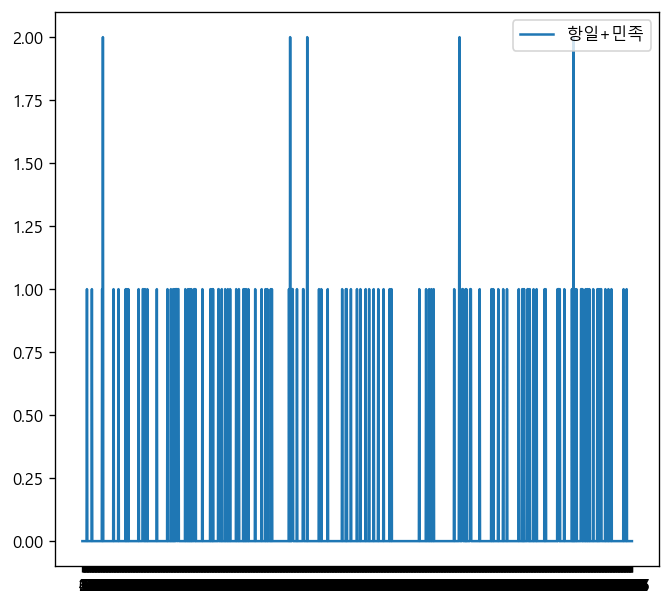

In [16]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['항일+민족']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '항일+민족')
plt.legend()
plt.show()

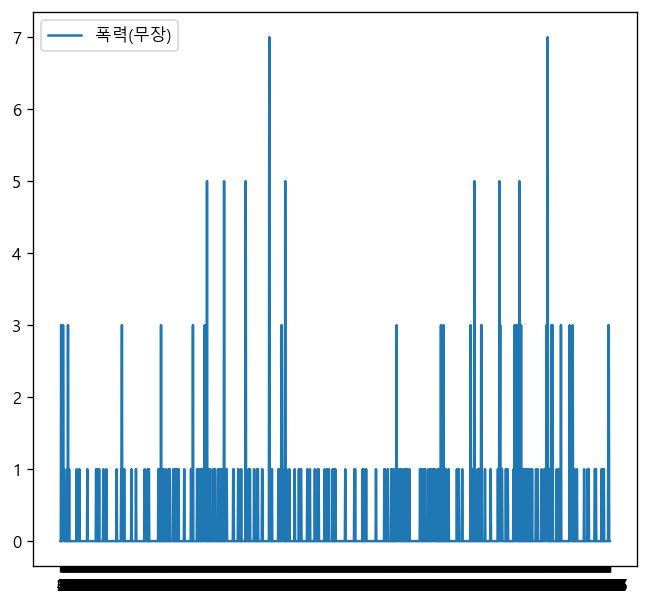

In [17]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['폭력(무장)']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '폭력(무장)')
plt.legend()
plt.show()

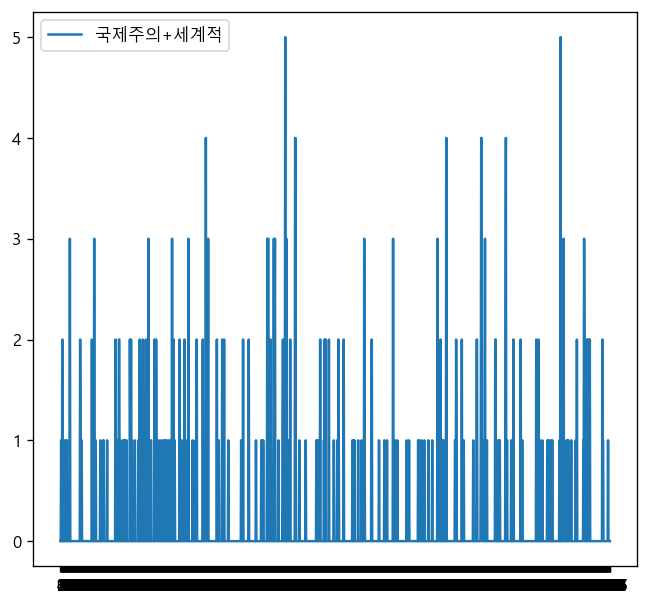

In [18]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['국제주의+세계적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '국제주의+세계적')
plt.legend()
plt.show()

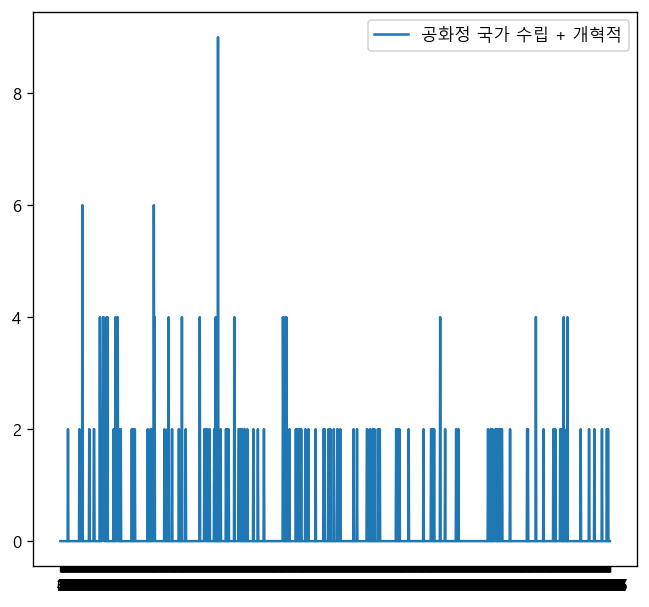

In [19]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['공화정 국가 수립 + 개혁적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '공화정 국가 수립 + 개혁적')
plt.legend()
plt.show()

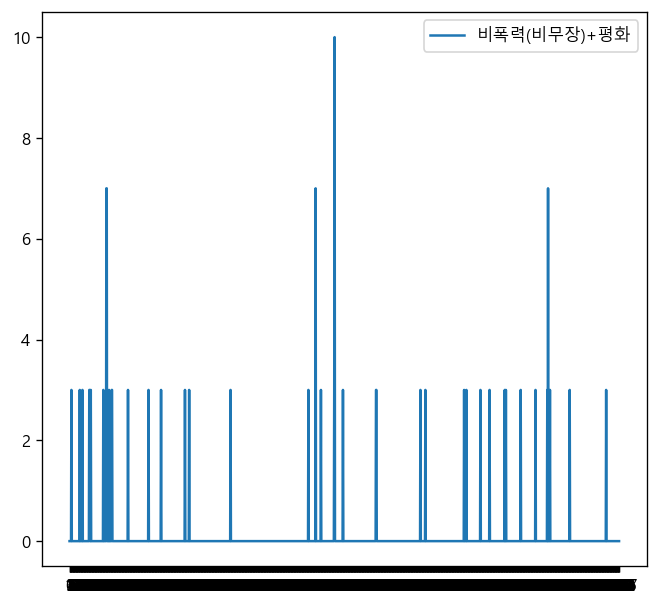

In [20]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['비폭력(비무장)+평화']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '비폭력(비무장)+평화')
plt.legend()
plt.show()

<Axes: xlabel='words', ylabel='freq'>

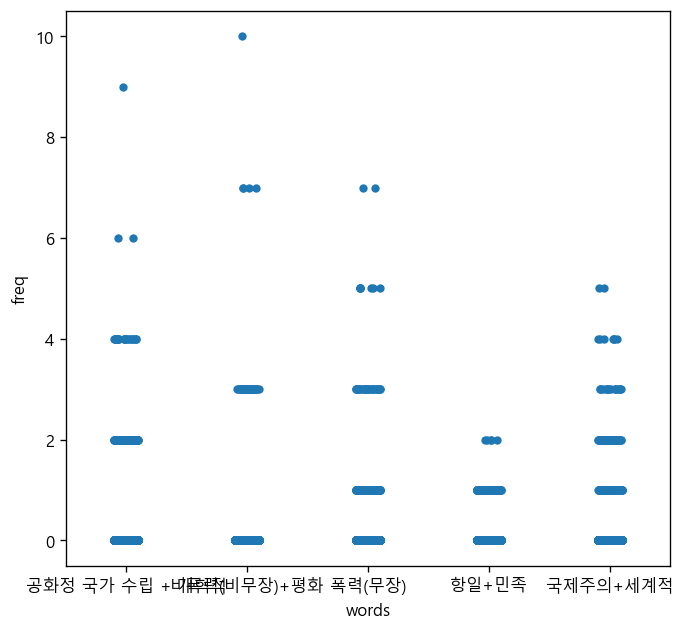

In [21]:
# 스트립 플롯 그리기
def dataRefinedForPlot(matrix, xIndex, listWords):
    import pandas as pd
    freq = []
    words = []
    for eachWord in listWords:
        for i in range(0,len(xIndex)):
            freq.append(int(matrix[str(i)][eachWord]))
            words.append(eachWord)
    refinedDF = pd.DataFrame({'words':words,'freq':freq})
    return refinedDF

inputDF = dataRefinedForPlot(corpus_tfidf_out, documentIndex, targetWords)

#스트립플롯은 데이터를 점으로 찍어 나타낸 그래프이다
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})


sns.stripplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

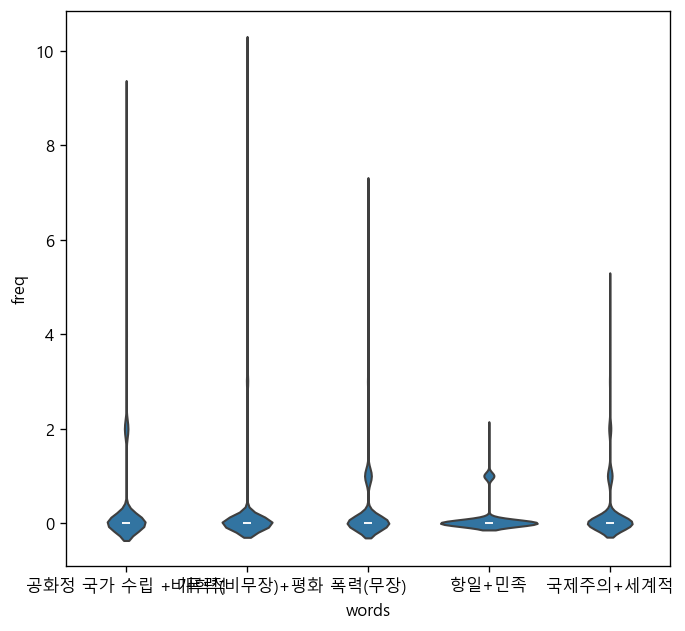

In [22]:
#바이올릿 차트
sns.violinplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

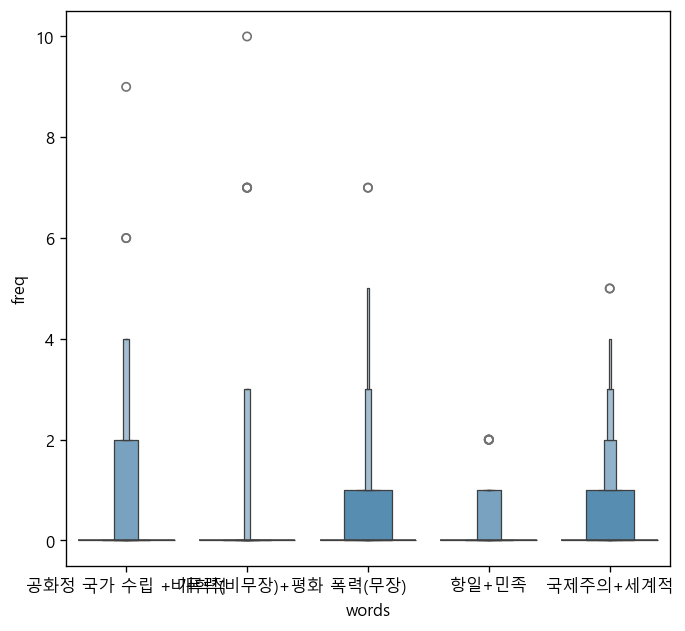

In [23]:
#박슨 플롯
sns.boxenplot(x='words', y='freq', data=inputDF)